# Anomaly Detection with Isolation Forests

This experiment is motivated by articles on [Wikipedia](https://en.wikipedia.org/wiki/Isolation_forest) and [Towards Data Science](https://towardsdatascience.com/anomaly-detection-with-isolation-forest-visualization-23cd75c281e2).

The code is copied and adapted from an [anomaly detection example from scikit-learn](https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_anomaly_comparison.html#sphx-glr-auto-examples-miscellaneous-plot-anomaly-comparison-py).

In [33]:
from sklearn.ensemble import IsolationForest
from sklearn.datasets import make_moons, make_blobs
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import randint

In [88]:
def plot(nparray, scale=1, title="Variable"):

    # Define the axis based on the image size
    xlen, ylen = nparray.shape
    x = np.linspace(0, xlen, xlen)
    y = np.linspace(0, ylen, ylen)
    X, Y = np.meshgrid(y, x)

    # Plot the image
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.plot_surface(X, Y, nparray, rstride=1, cstride=1,
                    cmap='viridis', edgecolor='none')
    ax.set_title(title)
    plt.xlabel("Day of Week")
    plt.ylabel("Week")

Anomaly at week # 3
Anomaly at week # 9


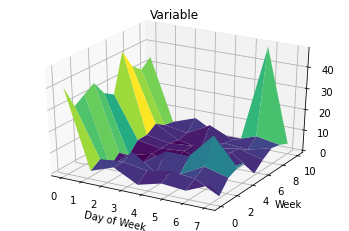

In [112]:
classifier = IsolationForest(contamination=float(.12), max_features=7, \
                             random_state=42, verbose=0)

X = randint(low=0, high=10, size=(10, 7))

monday = 0
saturday = 5

spike_locations = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
for v in spike_locations:
    X[v][monday] = randint(low=20, high=50, size=1)
    
anomaly_locations = [3, 9]
for v in anomaly_locations:
    X[v][saturday] = randint(low=20, high=50, size=1)
    
plot(X)


y_pred = classifier.fit(X).predict(X)

for i, pred in enumerate(y_pred):
    if pred == -1:
        print("Anomaly at week #", i)

In [80]:
matplotlib.rcParams['contour.negative_linestyle'] = 'solid'

# Example settings
n_samples = 300
outliers_fraction = 0.15
n_outliers = int(outliers_fraction * n_samples)
n_inliers = n_samples - n_outliers

In [14]:
# Define datasets
blobs_params = dict(random_state=0, n_samples=n_inliers, n_features=2)
datasets = [
    make_blobs(centers=[[0, 0], [0, 0]], cluster_std=0.5,
               **blobs_params)[0],
    make_blobs(centers=[[2, 2], [-2, -2]], cluster_std=[0.5, 0.5],
               **blobs_params)[0],
    make_blobs(centers=[[2, 2], [-2, -2]], cluster_std=[1.5, .3],
               **blobs_params)[0],
    4. * (make_moons(n_samples=n_samples, noise=.05, random_state=0)[0] -
          np.array([0.5, 0.25])),
    14. * (np.random.RandomState(42).rand(n_samples, 2) - 0.5)]

In [28]:
classifier = IsolationForest(contamination=n_outliers, random_state=42)
n_outliers

45

In [29]:
# Compare given classifiers under given settings
xx, yy = np.meshgrid(np.linspace(-7, 7, 150),
                     np.linspace(-7, 7, 150))

plt.figure(figsize=(2 * 2 + 3, 12.5))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

plot_num = 1
rng = np.random.RandomState(42)

<Figure size 504x900 with 0 Axes>

In [ ]:
for i_dataset, X in enumerate(datasets):
    
    # Add outliers
    X = np.concatenate([X, rng.uniform(low=-6, high=6,
                       size=(n_outliers, 2))], axis=0)
    
    classifier.fit(X)
    
    plt.subplot(len(datasets), 1, plot_num)
    if i_dataset == 0:
        plt.title(name, size=18)

    # fit the data and tag outliers
    y_pred = classifier.fit(X).predict(X)

    # plot the levels lines and the points
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')

    colors = np.array(['#377eb8', '#ff7f00'])
    plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[(y_pred + 1) // 2])

    plt.xlim(-7, 7)
    plt.ylim(-7, 7)
    plt.xticks(())
    plt.yticks(())
    
    plot_num += 1

plt.show()